<a href="https://colab.research.google.com/github/owen198/csc_domain_adaptation/blob/main/csc_datasets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [79]:
import random

from sklearn import preprocessing
from sklearn import svm
from sklearn import cluster
import pandas as pd
import datetime

import matplotlib
import matplotlib.pyplot as plt
import numpy as np

from keras import metrics
from keras import models
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import RepeatVector
from keras.layers import TimeDistributed
from keras.layers import Input, BatchNormalization, Activation
from keras.callbacks import EarlyStopping

In [80]:
from google.colab import drive
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [81]:
path = './gdrive/My Drive/data/CSC/W4/'

In [82]:
b_trend = True

In [83]:
drop_list = ['Unnamed: 0','_id','type','scada','timestamp','device', 'datetime']

In [84]:
oneClass_predictor = svm.OneClassSVM(nu=0.01, kernel="rbf", gamma=0.01)

In [85]:
def normalization (normal_df):
    
    min_max_scaler = preprocessing.MinMaxScaler()
    feature_names = list(normal_df)
    
    min_max_scaler = min_max_scaler.fit(normal_df.values)
    X_raw_minmax = min_max_scaler.transform(normal_df.values)
    normal_df = pd.DataFrame(X_raw_minmax, columns=feature_names)

    #X_raw_minmax = min_max_scaler.fit_transform(normal_df.values)
    #normal_df = pd.DataFrame(X_raw_minmax, columns=feature_names)
    
    return normal_df, min_max_scaler

In [86]:
def scorer_(Y_pred):
    a = (Y_pred[Y_pred == -1].size)/(Y_pred.size)
    return a*100

In [87]:
def plot_trend(data_df, 
               s_date, 
               e_date, 
               normalizer,
               predict_model):

    delta = datetime.timedelta(days=1)

    score_list = []
    datetime_list = []

    while s_date <= e_date:

        validation_df = data_df[(data_df['datetime'] > s_date) & 
                                (data_df['datetime'] <= s_date + delta)]


        if len(validation_df) > 0:
        
            validation_df = validation_df.drop(columns=drop_list)
            validation_df = normalizer.transform(validation_df)
            validation_df = predict_model.predict(validation_df)

            score_list.append(scorer_(validation_df))
            datetime_list.append(s_date)

            #print(s_date, scorer_(validation_df))

        s_date += delta

    
    # plot
    fig, ax = plt.subplots(figsize=(10, 3))
    plt.xticks(rotation=45)
    #index = -100

    ax.plot(datetime_list, score_list, marker='.')
    ax.set(xlabel='date', ylabel='score')
    ax.set_ylim([0, 100])

    #ax.legend()
    ax.grid()
    plt.tight_layout()
    #fig.savefig('score.png', dpi=300)

    #fig.savefig(path+tag+'-'+training_from.strftime("%Y%m%d")+'-'+training_to.strftime("%Y%m%d")+'.png', dpi=300)
    plt.show()

In [88]:
def check_duration(data_df, training_from, training_to, e_date):

    data_df['datetime'] = data_df['timestamp'].astype('int').astype("datetime64[s]")

    training_df = data_df[(data_df['datetime'] > training_from) &
                          (data_df['datetime'] < training_to)]

    training_df = training_df.drop(columns=drop_list)
    training_df, normalizer = normalization(training_df)
    predict_model = oneClass_predictor.fit(training_df)

    plot_trend (data_df, training_from, e_date, normalizer, predict_model)

    return data_df


# Check Abnormal Duration

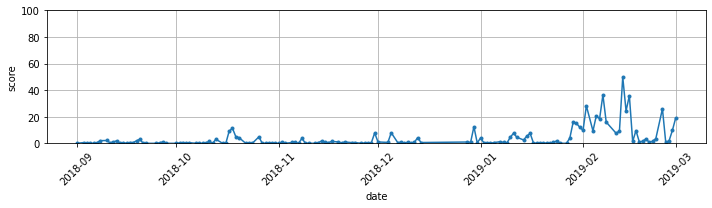

43518


In [89]:
W4633070102 = pd.concat([pd.read_csv(path+'W4633070102'+'_201809.csv'),
                         pd.read_csv(path+'W4633070102'+'_201810.csv'),
                         pd.read_csv(path+'W4633070102'+'_201811.csv'),
                         pd.read_csv(path+'W4633070102'+'_201812.csv'),
                         pd.read_csv(path+'W4633070102'+'_201901.csv'),
                         pd.read_csv(path+'W4633070102'+'_201902.csv'),
                         pd.read_csv(path+'W4633070102'+'_201903.csv')])

if b_trend:
    check_duration (W4633070102, 
                    datetime.datetime(2018,9,1,0,0), 
                    datetime.datetime(2018,12,1,0,0), 
                    datetime.datetime(2019,3,1,0,0))

print(len(W4633070102))

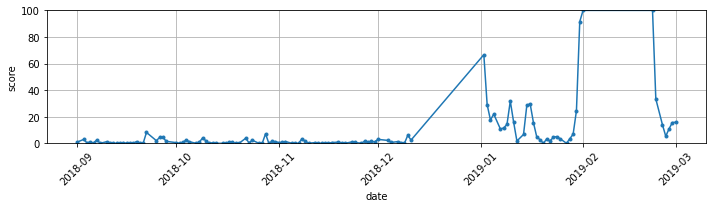

27559


In [90]:
W4633080500 = pd.concat([pd.read_csv(path+'W4633080500'+'_201809.csv'),
                         pd.read_csv(path+'W4633080500'+'_201810.csv'),
                         pd.read_csv(path+'W4633080500'+'_201811.csv'),
                         pd.read_csv(path+'W4633080500'+'_201812.csv'),
                         pd.read_csv(path+'W4633080500'+'_201901.csv'),
                         pd.read_csv(path+'W4633080500'+'_201902.csv'),
                         pd.read_csv(path+'W4633080500'+'_201903.csv')])

if b_trend:
    check_duration (W4633080500, 
                    datetime.datetime(2018,9,1,0,0), 
                    datetime.datetime(2018,12,1,0,0), 
                    datetime.datetime(2019,3,1,0,0))

print(len(W4633080500))

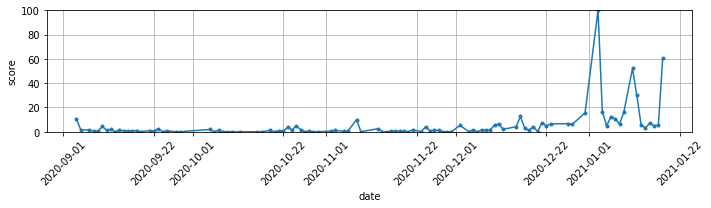

17017


In [91]:
W4633080200 = pd.concat([pd.read_csv(path+'W4633080200'+'_202009.csv'),
                         pd.read_csv(path+'W4633080200'+'_202010.csv'),
                         pd.read_csv(path+'W4633080200'+'_202011.csv'),
                         pd.read_csv(path+'W4633080200'+'_202012.csv'),
                         pd.read_csv(path+'W4633080200'+'_202101.csv')])

if b_trend:
    check_duration (W4633080200, 
                    datetime.datetime(2020,9,1,0,0), 
                    datetime.datetime(2020,12,1,0,0), 
                    datetime.datetime(2021,2,1,0,0))

print(len(W4633080200))

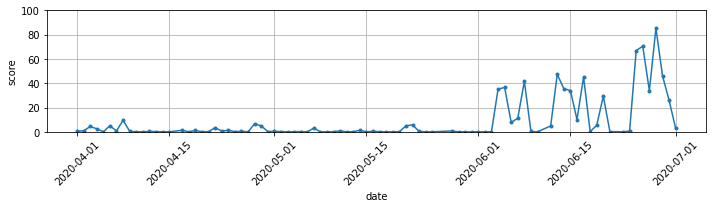

100873


In [92]:
W4662FM0400 = pd.concat([pd.read_csv(path+'W4662FM0400'+'_202003.csv'),
                         pd.read_csv(path+'W4662FM0400'+'_202004.csv'),
                         pd.read_csv(path+'W4662FM0400'+'_202005.csv'),
                         pd.read_csv(path+'W4662FM0400'+'_202006.csv'),
                         pd.read_csv(path+'W4662FM0400'+'_202007.csv')])

if b_trend:
    check_duration (W4662FM0400, 
                    datetime.datetime(2020,4,1,0,0), 
                    datetime.datetime(2020,6,1,0,0), 
                    datetime.datetime(2020,7,1,0,0))

print(len(W4662FM0400))

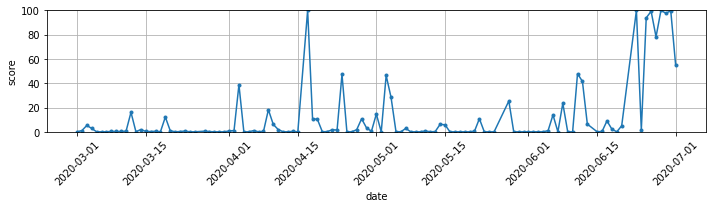

60900


In [93]:
W4662FM0605 = pd.concat([pd.read_csv(path+'W4662FM0605'+'_202003.csv'),
                         pd.read_csv(path+'W4662FM0605'+'_202004.csv'),
                         pd.read_csv(path+'W4662FM0605'+'_202005.csv'),
                         pd.read_csv(path+'W4662FM0605'+'_202006.csv'),
                         pd.read_csv(path+'W4662FM0605'+'_202007.csv')])

if b_trend:
    check_duration (W4662FM0605, 
                    datetime.datetime(2020,3,1,0,0), 
                    datetime.datetime(2020,4,1,0,0), 
                    datetime.datetime(2020,7,1,0,0))

print(len(W4662FM0605))

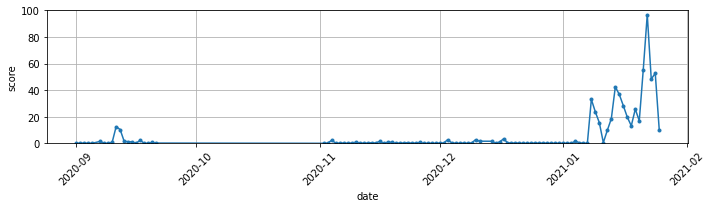

51829


In [94]:
W4662FM0606 = pd.concat([pd.read_csv(path+'W4662FM0606'+'_202009.csv'),
                         pd.read_csv(path+'W4662FM0606'+'_202010.csv'),
                         pd.read_csv(path+'W4662FM0606'+'_202011.csv'),
                         pd.read_csv(path+'W4662FM0606'+'_202012.csv'),
                         pd.read_csv(path+'W4662FM0606'+'_202101.csv'),
                         pd.read_csv(path+'W4662FM0606'+'_202102.csv')])

if b_trend:
    check_duration (W4662FM0606, 
                    datetime.datetime(2020,9,1,0,0), 
                    datetime.datetime(2021,1,1,0,0), 
                    datetime.datetime(2021,2,1,0,0))

print(len(W4662FM0606))

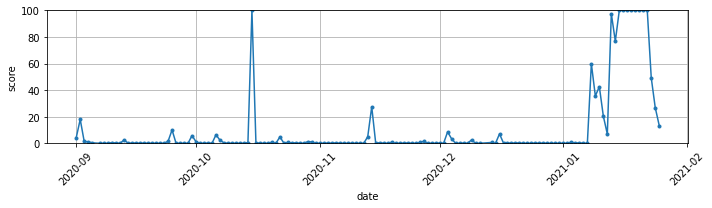

65874


In [95]:
W4662FM0507 = pd.concat([pd.read_csv(path+'W4662FM0507'+'_202009.csv'),
                         pd.read_csv(path+'W4662FM0507'+'_202010.csv'),
                         pd.read_csv(path+'W4662FM0507'+'_202011.csv'),
                         pd.read_csv(path+'W4662FM0507'+'_202012.csv'),
                         pd.read_csv(path+'W4662FM0507'+'_202101.csv'),
                         pd.read_csv(path+'W4662FM0507'+'_202102.csv')])

if b_trend:
    check_duration (W4662FM0507, 
                    datetime.datetime(2020,9,1,0,0), 
                    datetime.datetime(2021,1,1,0,0), 
                    datetime.datetime(2021,2,1,0,0))

print(len(W4662FM0507))

# Datasets distrubution

In [174]:
label = ['W4633070102', 
         'W4633080500', 
         'W4633080200',
         'W4662FM0400',
         'W4662FM0605',
         'W4662FM0606',
         'W4662FM0507']

disp_label = ['102', 
         '500', 
         '200',
         '400',
         '605',
         '606',
         '507']

In [97]:
dist_pd = pd.DataFrame()

for tag in label:
    globals()[tag]['label']=tag

    dist_pd = dist_pd.append(globals()[tag].drop(columns=drop_list))

dist_pd = dist_pd.sample(5000)

In [98]:
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import manifold

dist_no, normalizer = normalization(dist_pd.drop(columns=['label']))

X_tsne = manifold.TSNE(n_components=2, verbose=1, 
                      n_iter=500, 
                      perplexity=20).fit_transform(dist_no)

#X_tsne = PCA(n_components=2).fit_transform(dist_pd.drop(columns=['label']))

[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Indexed 5000 samples in 0.242s...
[t-SNE] Computed neighbors for 5000 samples in 6.069s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 0.231813
[t-SNE] KL divergence after 250 iterations with early exaggeration: 63.893017
[t-SNE] KL divergence after 500 iterations: 0.823278


In [99]:
#x_min, x_max = X_tsne.min(0), X_tsne.max(0)
#X_norm = (X_tsne-x_min) / (x_max-x_min)  #Normalize

tsne_df = pd.DataFrame(X_tsne, columns = ['dim1','dim2'])
tsne_df['y'] = dist_pd['label'].values

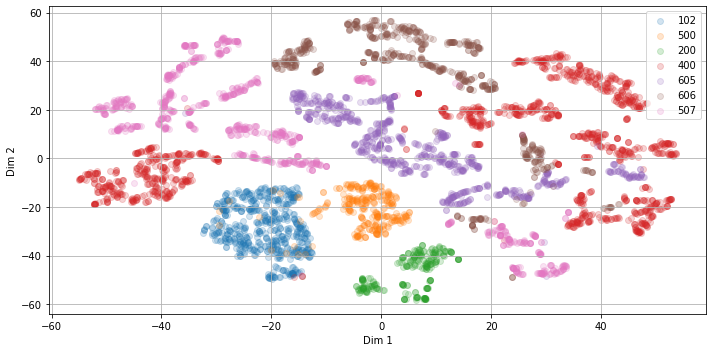

In [176]:
fig, ax = plt.subplots(figsize=(10,5))

#color = ['tab:blue', 'tab:orange', 'tab:green']

i=0
for tag in label:
    ax.scatter(tsne_df[tsne_df['y']==tag]['dim1'], 
               tsne_df[tsne_df['y']==tag]['dim2'], 
               alpha=0.2,
               label=disp_label[i],
               cmap='Spectral')
    i=i+1

ax.legend()
ax.grid(True)
plt.xlabel('Dim 1')
plt.ylabel('Dim 2')
#plt.title('Vibration data on T-SNE projection')
plt.tight_layout()
fig.savefig('tsne.png', dpi=300)

plt.show()

# Data visualization

In [168]:
#list(globals()[label[0]])

tmp_dt = globals()[label[4]]['timestamp']
tmp_dt = tmp_dt.astype('int').astype("datetime64[s]")

tmp = globals()[label[5]].drop(columns=drop_list)
tmp_list = list(tmp)
tmp_list.remove('label')

nd_array = normalizer.transform(tmp.drop(columns=['label']))

df = pd.DataFrame(nd_array, columns = tmp_list)

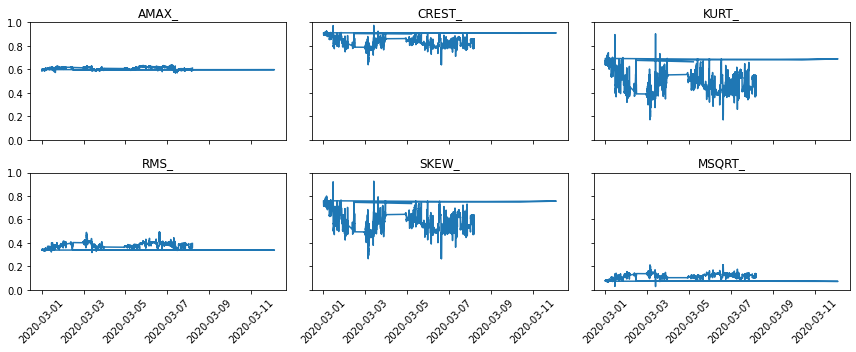

In [181]:
draw_list = ['AMAX_', 'CREST_', 'KURT_', 'RMS_', 'SKEW_', 'MSQRT_']

fig, axs = plt.subplots(2, 3, figsize=(12,5))

axs = axs.ravel()

for i in range(len(draw_list)): 
  axs[i].plot(tmp_dt.head(3000), df[draw_list[i]].head(3000))
  axs[i].set_title(draw_list[i])

  for tick in axs[i].get_xticklabels():
      tick.set_rotation(45)

  axs[i].set_ylim([0, 1])

#for ax in axs.flat:
#    ax.set(xlabel='Time', ylabel='y-label')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

fig.tight_layout()
fig.savefig('features.png', dpi=300)

In [103]:
draw_list = ['AMAX_', 'CREST_', 'KURT_', 'RMS_', 'SKEW_', 'MSQRT_']

In [180]:
set([i.split('_')[0] for i in tmp_list])

{'AMAX',
 'AMAXoAM',
 'AMAXoMSQRT',
 'AX3oMX1$5',
 'CREST',
 'KURT',
 'MAX',
 'MSQRT',
 'RMS',
 'RMSSoAM',
 'SKEW',
 'WENTPY',
 'X16oMX28',
 'X6oMX23',
 'X8oMX24'}

In [182]:
tmp_list

['AMAX_',
 'AMAX_AHIL',
 'AMAX_HILWDEC0',
 'AMAX_HILWDEC1',
 'AMAX_HILWDEC2',
 'AMAX_HILWDEC3',
 'AMAX_HILWDEC4',
 'AMAX_HILWDEC5',
 'AMAX_HILWDEC6',
 'AMAX_HILWDEC7',
 'AMAX_WDEC0',
 'AMAX_WDEC0HIL',
 'AMAX_WDEC1',
 'AMAX_WDEC1HIL',
 'AMAX_WDEC2',
 'AMAX_WDEC2HIL',
 'AMAX_WDEC3',
 'AMAX_WDEC3HIL',
 'AMAX_WDEC4',
 'AMAX_WDEC4HIL',
 'AMAX_WDEC5',
 'AMAX_WDEC5HIL',
 'AMAX_WDEC6',
 'AMAX_WDEC6HIL',
 'AMAX_WDEC7',
 'AMAX_WDEC7HIL',
 'AMAXoAM_',
 'AMAXoAM_AHIL',
 'AMAXoAM_HILWDEC0',
 'AMAXoAM_HILWDEC1',
 'AMAXoAM_HILWDEC2',
 'AMAXoAM_HILWDEC3',
 'AMAXoAM_HILWDEC4',
 'AMAXoAM_HILWDEC5',
 'AMAXoAM_HILWDEC6',
 'AMAXoAM_HILWDEC7',
 'AMAXoAM_WDEC0',
 'AMAXoAM_WDEC0HIL',
 'AMAXoAM_WDEC1',
 'AMAXoAM_WDEC1HIL',
 'AMAXoAM_WDEC2',
 'AMAXoAM_WDEC2HIL',
 'AMAXoAM_WDEC3',
 'AMAXoAM_WDEC3HIL',
 'AMAXoAM_WDEC4',
 'AMAXoAM_WDEC4HIL',
 'AMAXoAM_WDEC5',
 'AMAXoAM_WDEC5HIL',
 'AMAXoAM_WDEC6',
 'AMAXoAM_WDEC6HIL',
 'AMAXoAM_WDEC7',
 'AMAXoAM_WDEC7HIL',
 'AMAXoMSQRT_',
 'AMAXoMSQRT_AHIL',
 'AMAXoMSQRT_HILWDEC0'